# Future Weather Forcasting

## Installing Requred Libraries And Packages

In [127]:
# !pip install -U scikit-learn
# !python -m pip install --upgrade pip
# !pip install matplotlib
# !python -m pip install seaborn
# !pip install openpyxl
# !python -m pip install prophet
# !pip install --upgrade plotly
# !pip install plotly==5.10.0

## Importing Requred Libraries And Packages

In [141]:
import numpy as np  
import pandas as pd 
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.preprocessing import MinMaxScaler
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot, plot_plotly, plot_components_plotly
import warnings
import plotly.graph_objects as go
warnings.filterwarnings("ignore")
sns.set_theme()

## Importing Dataset

In [129]:
df = pd.read_excel('../dataset/weather data.xlsx')

In [130]:
df.head()

,Year,Month,Day,Temperature Max,Temperature Min,Precipitation,Humidity,Wind Speed Max,Wind Speed Min,Wind Speed Range,Wind DIrection
0,1981,1,1,24.68,12.73,0.0,8.48,5.12,2.68,2.45,179.69
1,1981,1,2,24.05,14.08,0.0,7.81,3.63,1.89,1.75,187.94
2,1981,1,3,23.69,13.35,0.0,7.81,3.38,0.77,2.61,184.81
3,1981,1,4,24.32,13.90,0.0,7.81,3.23,0.44,2.80,193.38
4,1981,1,5,24.44,14.44,0.0,9.52,3.53,1.01,2.53,187.00


In [131]:
df.isnull().any()

Year                False
Month               False
Day                 False
Temperature Max     False
Temperature Min     False
Precipitation       False
Humidity            False
Wind Speed Max      False
Wind Speed Min      False
Wind Speed Range    False
Wind DIrection      False
dtype: bool

In [132]:
# cols = df.columns.difference(['Temperature Max', 'Temperature Min', 'Precipitation', 'Humidity', 'Wind Speed Max', 'Wind Speed Min', 'Wind Speed Range', 'Wind DIrection'])
# df['Date'] = df[cols].apply(lambda x: '-'.join(x.dropna().astype(int).astype(str)), 1)
# df = df.drop(cols, axis=1)

## Preprocessing Dataset

In [133]:
df['Date'] = df[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1)
df = df.drop(df[['Year', 'Month', 'Day']], axis=1)
df

,Temperature Max,Temperature Min,Precipitation,Humidity,Wind Speed Max,Wind Speed Min,Wind Speed Range,Wind DIrection,Date
0,24.68,12.73,0.0,8.48,5.12,2.68,2.45,179.69,1981-1-1
1,24.05,14.08,0.0,7.81,3.63,1.89,1.75,187.94,1981-1-2
2,23.69,13.35,0.0,7.81,3.38,0.77,2.61,184.81,1981-1-3
3,24.32,13.90,0.0,7.81,3.23,0.44,2.80,193.38,1981-1-4
4,24.44,14.44,0.0,9.52,3.53,1.01,2.53,187.00,1981-1-5
...,...,...,...,...,...,...,...,...,...
14970,24.18,13.95,0.0,9.95,4.73,0.77,3.95,141.75,2021-12-27
14971,24.11,13.77,0.0,9.70,4.21,1.82,2.38,77.81,2021-12-28
14972,24.04,13.95,0.0,9.34,3.66,1.04,2.62,155.25,2021-12-29
14973,26.97,15.18,0.0,9.16,4.85,0.27,4.59,148.12,2021-12-30


## Dataset Visualization

### Data Frequency


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

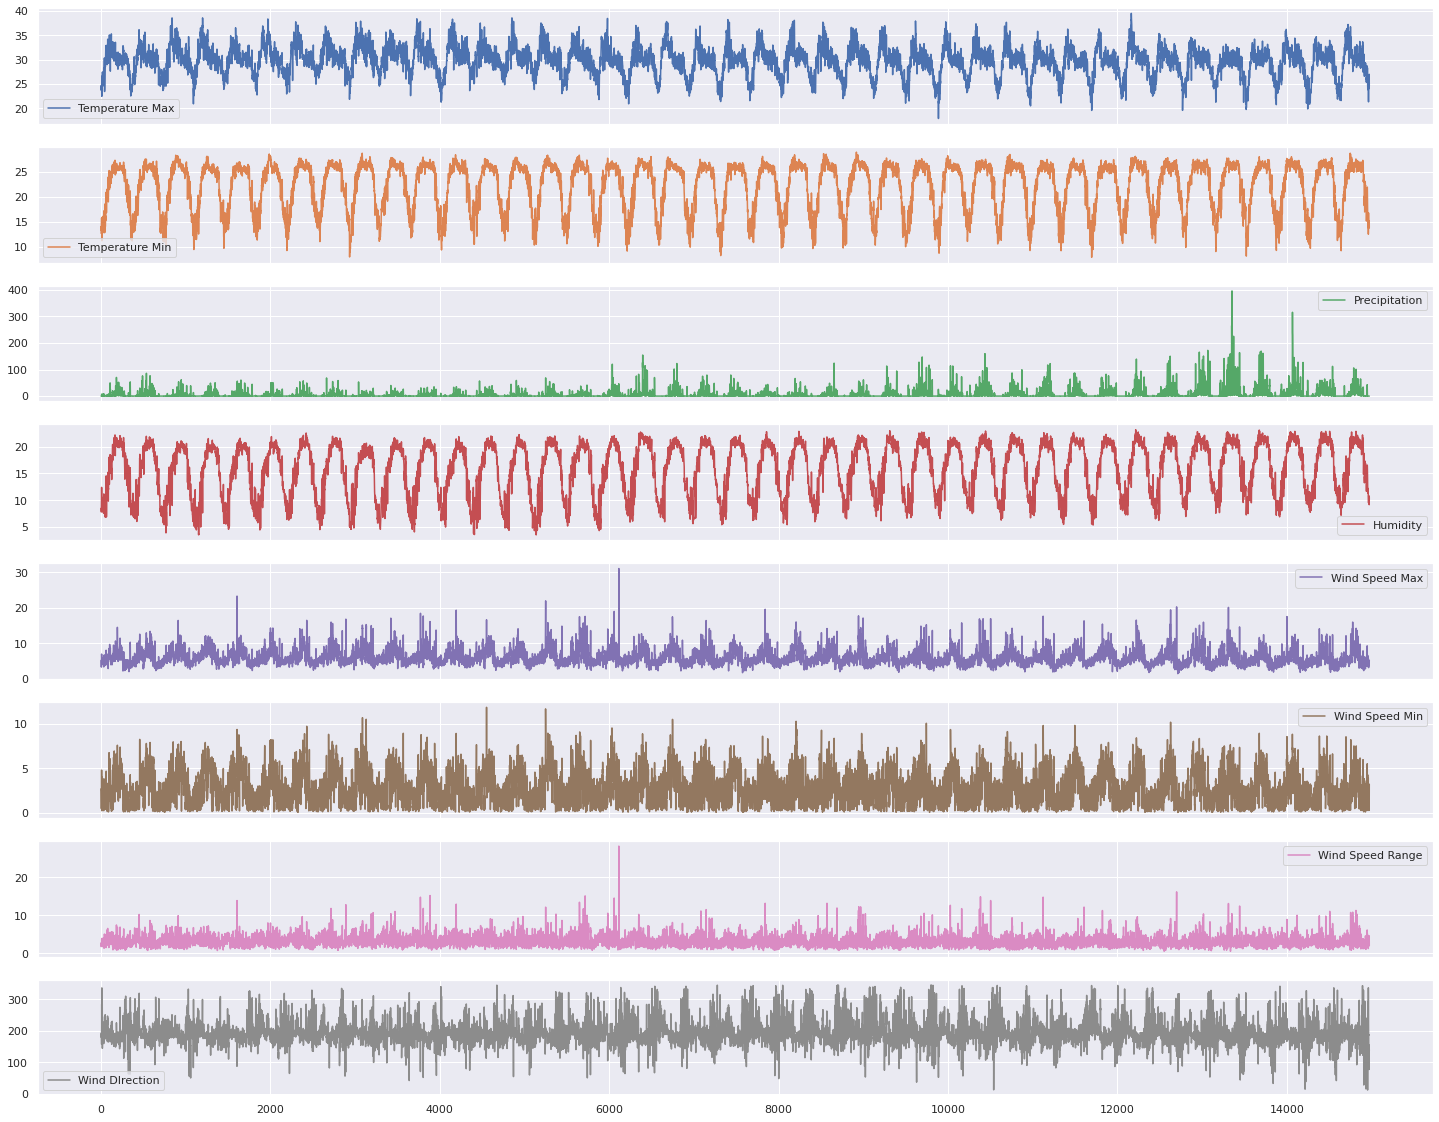

In [134]:
df.plot(subplots=True, figsize=(25,20))

### Data Heatmap


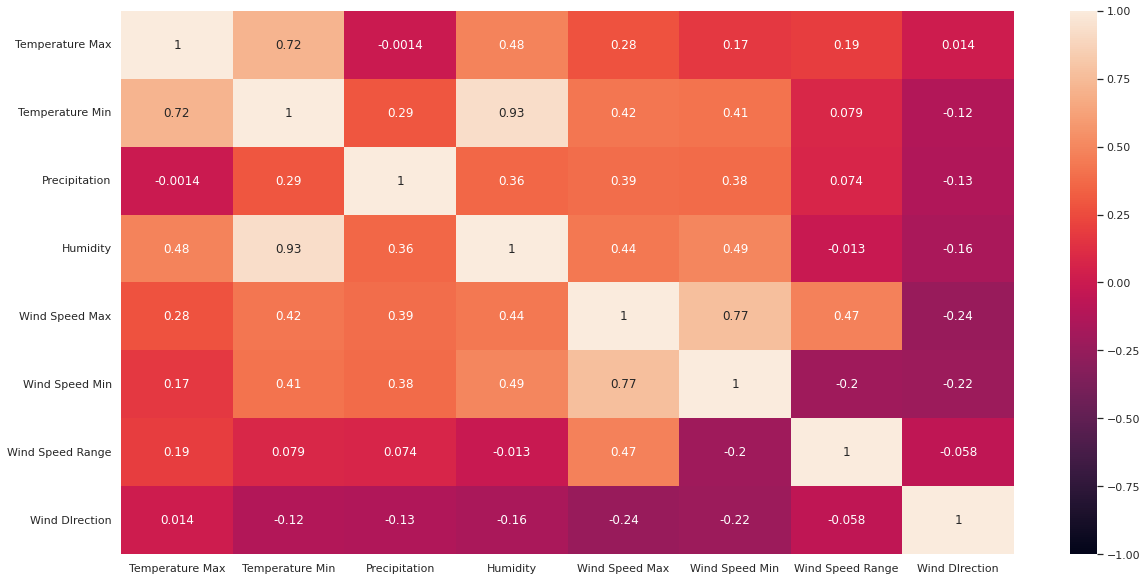

In [135]:
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

### alternative

In [136]:
# plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
# ax = sns.countplot(x=df['Temperature Max'])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
# plt.tight_layout()
# plt.show()

In [137]:
# plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
# ax = sns.countplot(x=df['Temperature Min'])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
# plt.tight_layout()
# plt.show()

### Histogram 1

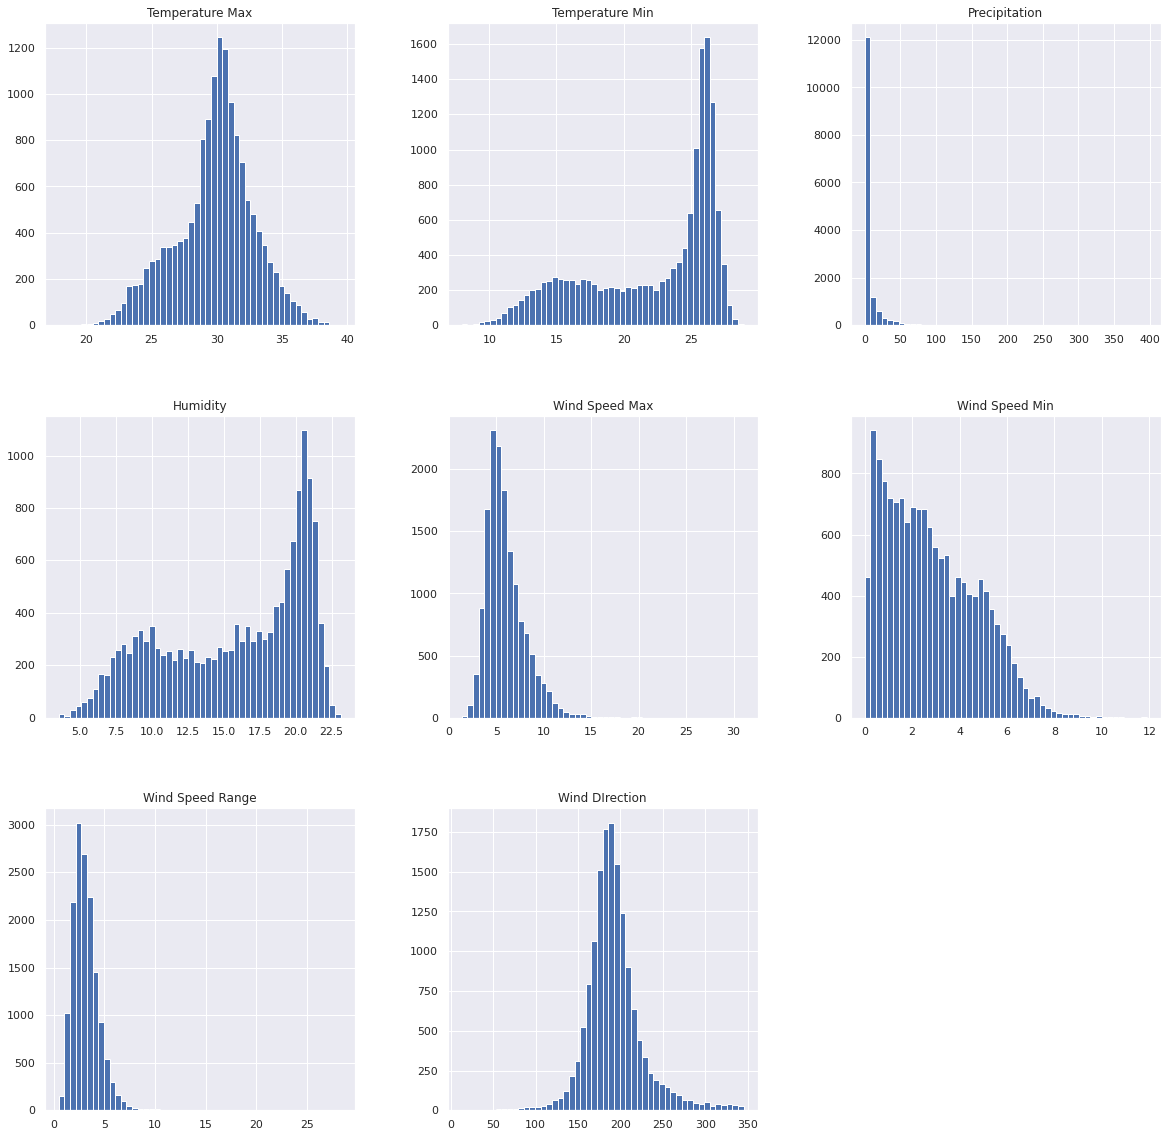

In [138]:
df.hist(bins=50, figsize=(20, 20))
plt.show()

### Histogram 2

<AxesSubplot:xlabel='Wind DIrection', ylabel='Count'>

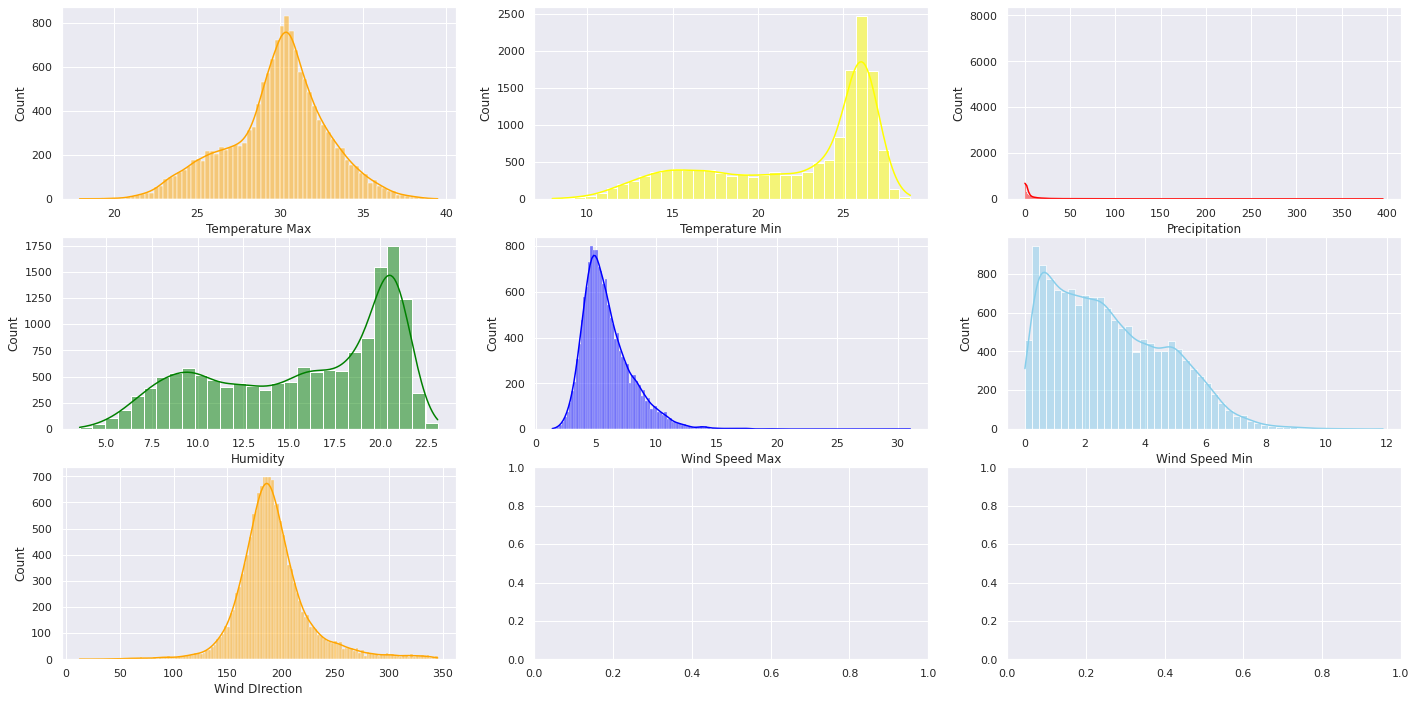

In [139]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(3,3,figsize=(24,12))
sns.histplot(data=df,x="Temperature Max",kde=True,ax=axs[0,0],color='orange')
sns.histplot(data=df,x="Temperature Min",kde=True,ax=axs[0,1],color='yellow')
sns.histplot(data=df,x="Precipitation",kde=True,ax=axs[0,2],color='red')
sns.histplot(data=df,x="Humidity",kde=True,ax=axs[1,0],color='green')
sns.histplot(data=df,x="Wind Speed Max",kde=True,ax=axs[1,1],color='blue')
sns.histplot(data=df,x="Wind Speed Min",kde=True,ax=axs[1,2],color='skyblue')
sns.histplot(data=df,x="Wind DIrection",kde=True,ax=axs[2,0],color='orange')

In [121]:
# df.columns

## **Model**

In [140]:
model = Prophet()

### Evaluations

> *Evaluations of Parameters such as (**Temperature Max, Temperature Min, Precipitation, Humidity, Wind Speed Max, Wind Speed Min, Wind DIrection**)*

- **Max Temperature**

- **Min Temperature**

- **Precipitation**

- **Max Wind Speed**

- **Min Wind Speed**

- **Min Temperature**

- **Humidity**

In [87]:
df_for_humidity=df[['Date','Humidity']]
df_for_humidity['Date']=pd.to_datetime(df_for_humidity['Date'])
df_for_humidity.rename(columns = {'Date':'ds'}, inplace = True)
df_for_humidity.rename(columns = {'Humidity':'y'}, inplace = True)
model.fit(df_for_humidity)

09:19:53 - cmdstanpy - INFO - Chain [1] start processing
09:19:58 - cmdstanpy - INFO - Chain [1] done processing


In [98]:
future = model.make_future_dataframe(periods=1400)
future.tail(5)

In [105]:
forecast = model.predict(future)
# forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
16370,2025-10-27,17.642828,15.780102,19.492772
16371,2025-10-28,17.499377,15.466594,19.440436
16372,2025-10-29,17.365410,15.438160,19.272819
16373,2025-10-30,17.208217,15.225648,19.150390
16374,2025-10-31,17.070935,15.099565,19.110366


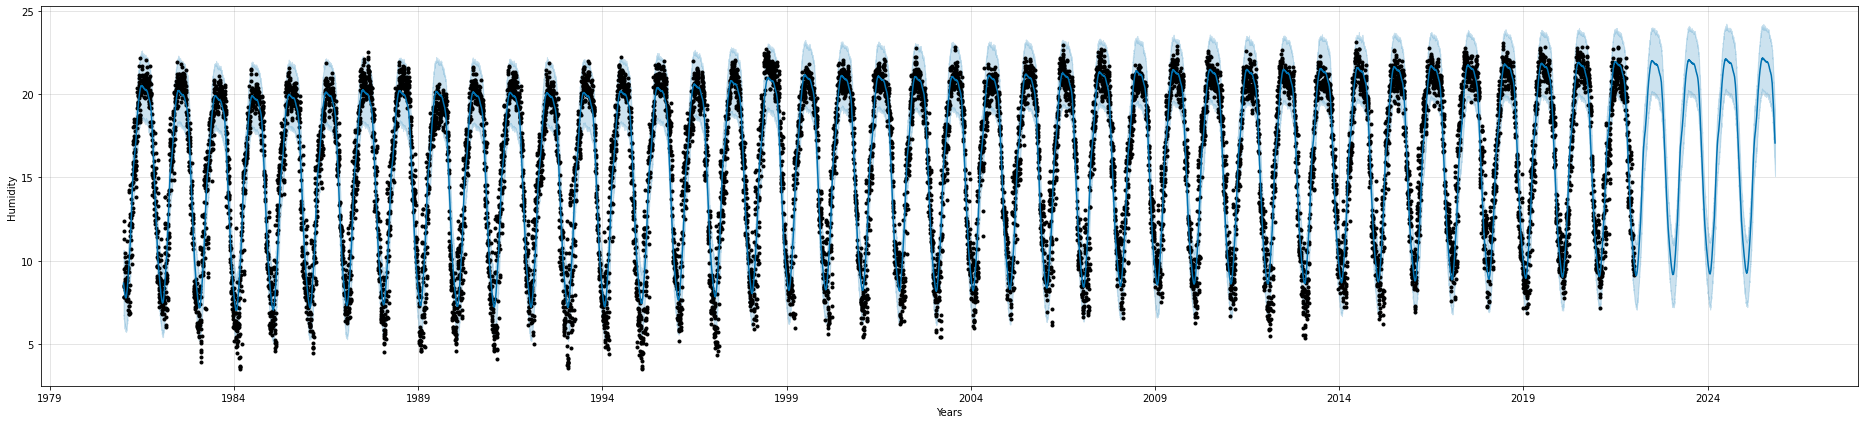

In [106]:
fig1 = model.plot(forecast, figsize=(26, 6))
plt.grid(True, which='major', c='grey', ls='-', lw=1, alpha=0.2)
plt.xlabel('Years')
plt.ylabel('Humidity')
plt.tight_layout()
plt.show()

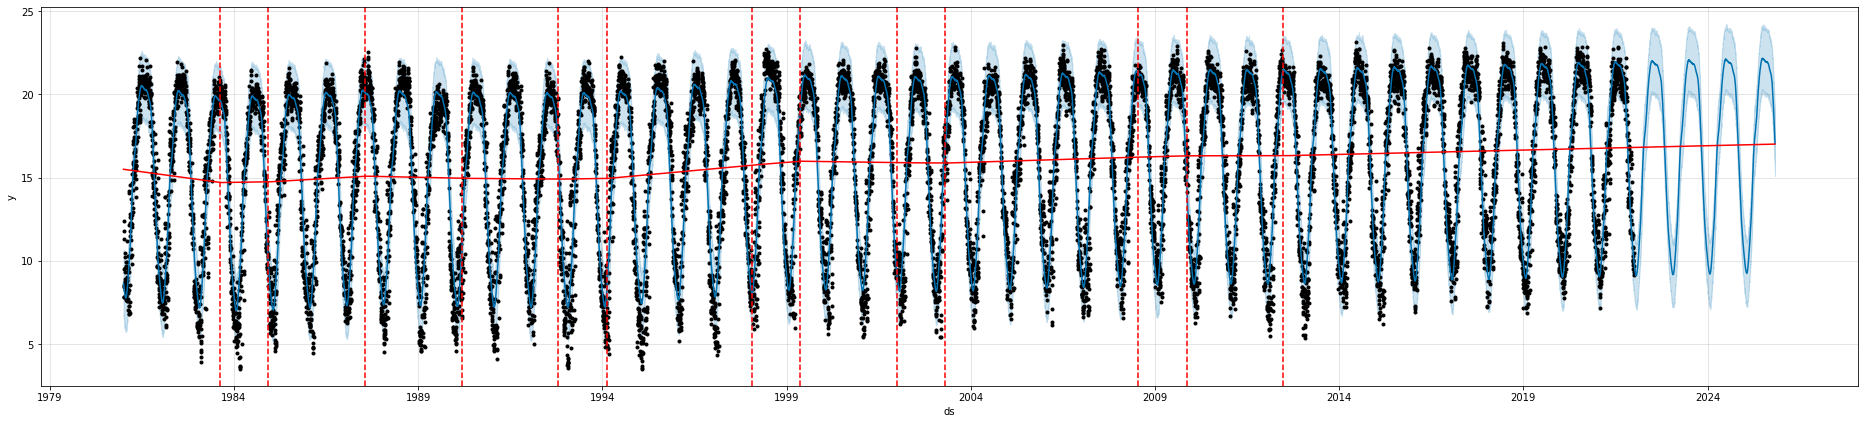

In [107]:
fig = model.plot(forecast,figsize=(26, 6))
# fig = m.plot(forecast,figsize=(20, 12))
a = add_changepoints_to_plot(fig.gca(), model, forecast)

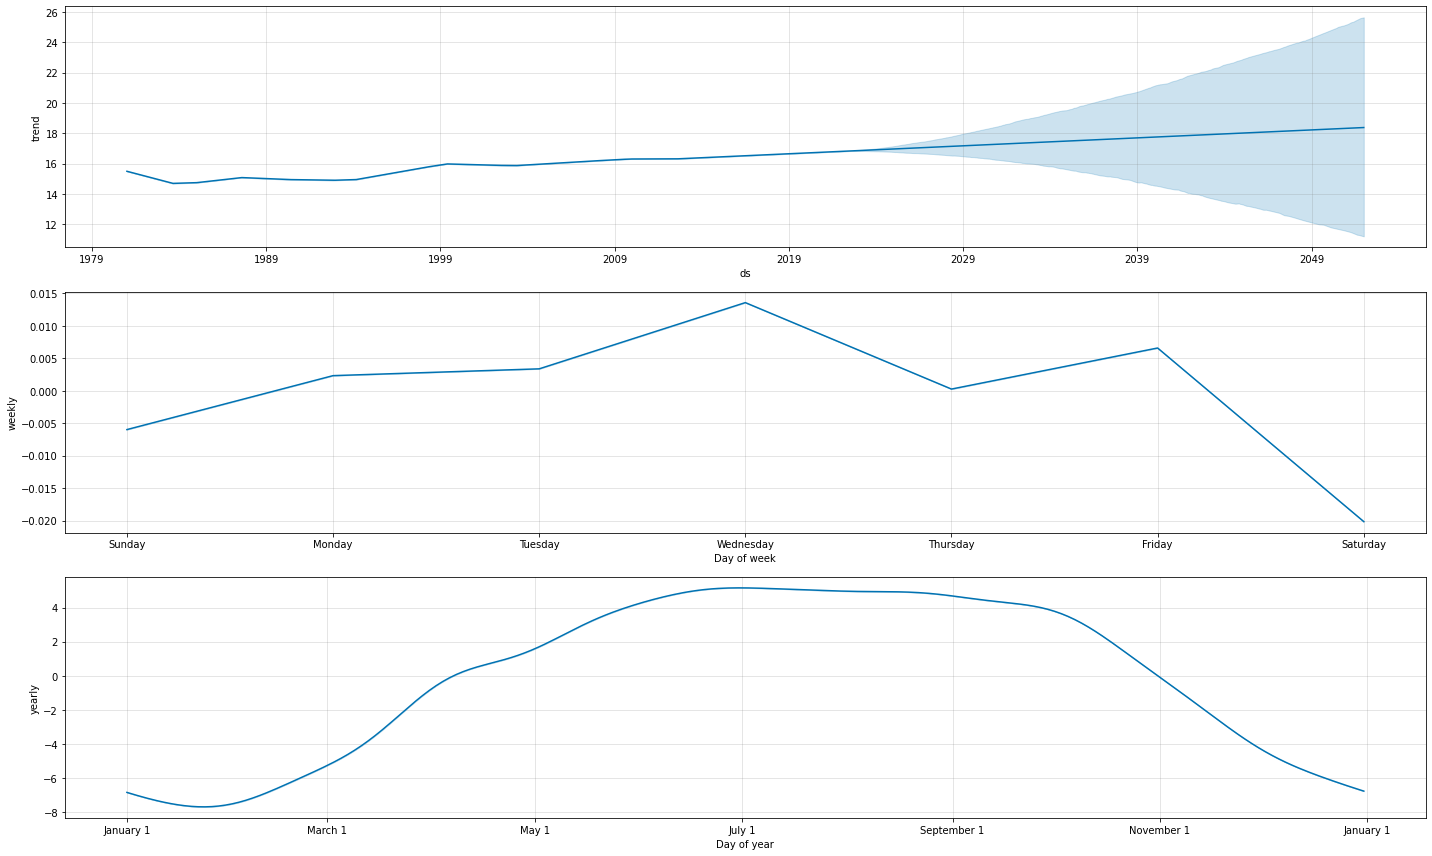

In [25]:
fig2 = m.plot_components(forecast, figsize=(20, 12))

In [146]:
fig = go.Figure()
WINdIR = ['E', 'ENE', 'NE', 'NNE', 'NNW', 'NW', 'WNW', 'WSW', 'SW', 'SSW', 'SSE', 'SE', 'ESE', 'N', 'W', 'S']
             
fig.add_trace(go.Scatterpolar(r=df.groupby('Wind DIrection')['Wind DIrection'].mean(),
                          theta=WINdIR,
                          name='Wind DIrection',
                          fill='toself',
                          )
             )
fig.update_layout(polar=dict(radialaxis=dict(visible=False)),
                  showlegend=True,
                  title='Wind Direction',
                  titlefont={'size': 28, 'family':'Serif'},
                #   template='plotly_dark',
                #   paper_bgcolor='lightgray',
                  width=600, height=500,
                 )
fig.show()

In [142]:
df.columns

Index(['Temperature Max', 'Temperature Min', 'Precipitation', 'Humidity',
       'Wind Speed Max', 'Wind Speed Min', 'Wind Speed Range',
       'Wind DIrection', 'Date'],
      dtype='object')